In [1]:
import os
from PIL import Image
from sahi.model import MmdetDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import visualize_object_predictions
import numpy as np
import pickle
from collections import defaultdict
import pandas as pd
import datetime

/vol/bitbucket/jrb21/anaconda3/envs/sodb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load the model

In [2]:
detection_model = MmdetDetectionModel(
    model_path= "models-to-test/latest.pth",
    config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py",
    device='cuda' # or 'cpu'
)

load checkpoint from local path: models-to-test/latest.pth


### Run inference on a single image

In [9]:
test_img_path = "WV3/A14_2_cambridge.tif"
width, height = (400,400)

sliced_pred_result = get_sliced_prediction(
    test_img_path,
    detection_model, 
    slice_width=width, 
    slice_height=height
)

Performing prediction on 500 number of slices.


In [10]:
sliced_pred_result.object_prediction_list

[ObjectPrediction<
     bbox: BoundingBox: <(615, 960, 634, 966), w: 19, h: 6>,
     mask: None,
     score: PredictionScore: <value: 0.510311484336853>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(6015, 5130, 6030, 5142), w: 15, h: 12>,
     mask: None,
     score: PredictionScore: <value: 0.45968562364578247>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(6084, 5128, 6101, 5142), w: 17, h: 14>,
     mask: None,
     score: PredictionScore: <value: 0.4479471743106842>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(6080, 5158, 6085, 5172), w: 5, h: 14>,
     mask: None,
     score: PredictionScore: <value: 0.43382689356803894>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(4074, 3557, 4090, 3571), w: 16, h: 14>,
     mask: None,
     score: PredictionScore: <value: 0.4292348623275757

### Batch prediction

In [3]:
MODEL_PATH = "models-to-test/latest.pth"
MODEL_CONFIG_PATH = config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py"
EVAL_IMAGES_FOLDER_DIR = "WV3/crop_tiff"
EXPORT_VISUAL = True

INFERENCE_SETTING_TO_PARAMS = {
    "XVIEW_SAHI": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_PO": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
    "XVIEW_SAHI_FI": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_FI_PO": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
}

# Of the above 4 options I want to slice and not do full image size inference
INFERENCE_SETTING = "XVIEW_SAHI_PO"
setting_params = INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]

# From the evaluation py file I delete the eval dataset path and change the confidence to 0.3
result = predict(
    model_type="mmdet",
    model_path=MODEL_PATH,
    model_config_path=MODEL_CONFIG_PATH,
    model_confidence_threshold=0.2,
    model_device="cuda:0",
    model_category_mapping=None,
    model_category_remapping=None,
    source=EVAL_IMAGES_FOLDER_DIR,
    no_standard_prediction=setting_params["no_standard_prediction"],
    no_sliced_prediction=setting_params["no_sliced_prediction"],
    image_size=None,
    slice_height=setting_params["slice_size"],
    slice_width=setting_params["slice_size"],
    overlap_height_ratio=setting_params["overlap_ratio"],
    overlap_width_ratio=setting_params["overlap_ratio"],
    postprocess_type="GREEDYNMM",
    postprocess_match_metric="IOS",
    postprocess_match_threshold=0.5,
    postprocess_class_agnostic=True,
    novisual=not EXPORT_VISUAL,
    project="runs/highways",
    name=INFERENCE_SETTING,
    visual_bbox_thickness=1,
    visual_text_size=0.3,
    visual_text_thickness=1,
    visual_export_format="png",
    verbose=0,
    return_dict=True,
    force_postprocess_type=True,
    export_pickle = True,
)

load checkpoint from local path: models-to-test/latest.pth


Performing inference on images:   0%|                                                                                                | 0/19 [00:20<?, ?it/s]

Prediction time is: 20095.45 ms


Performing inference on images:   5%|████▋                                                                                   | 1/19 [00:59<06:11, 20.66s/it]

Prediction time is: 38824.57 ms


Performing inference on images:  11%|█████████▎                                                                              | 2/19 [02:09<09:01, 31.87s/it]

Prediction time is: 68690.67 ms


Performing inference on images:  16%|█████████████▉                                                                          | 3/19 [02:32<13:10, 49.39s/it]

Prediction time is: 21364.53 ms


Performing inference on images:  21%|██████████████████▌                                                                     | 4/19 [02:43<09:37, 38.51s/it]

Prediction time is: 10892.62 ms


Performing inference on images:  26%|███████████████████████▏                                                                | 5/19 [03:32<06:41, 28.65s/it]

Prediction time is: 48755.81 ms


Performing inference on images:  32%|███████████████████████████▊                                                            | 6/19 [04:15<07:46, 35.85s/it]

Prediction time is: 41603.61 ms


Performing inference on images:  37%|████████████████████████████████▍                                                       | 7/19 [04:32<07:36, 38.01s/it]

Prediction time is: 16310.41 ms


Performing inference on images:  42%|█████████████████████████████████████                                                   | 8/19 [05:00<05:43, 31.24s/it]

Prediction time is: 27277.44 ms


Performing inference on images:  47%|█████████████████████████████████████████▋                                              | 9/19 [06:14<05:01, 30.17s/it]

Prediction time is: 73622.31 ms


Performing inference on images:  53%|█████████████████████████████████████████████▊                                         | 10/19 [06:53<06:36, 44.06s/it]

Prediction time is: 37497.03 ms


Performing inference on images:  58%|██████████████████████████████████████████████████▎                                    | 11/19 [06:53<05:38, 42.32s/it]08/09/2022 15:54:03 - WARNING - sahi.model -   ignoring invalid prediction with bbox: [280.19397    0.       272.0352     5.448236]
08/09/2022 15:54:05 - WARNING - sahi.model -   ignoring invalid prediction with bbox: [379.91833   46.639244 377.91913   63.057003]
Performing inference on images:  63%|██████████████████████████████████████████████████████▉                                | 12/19 [06:59<03:38, 31.17s/it]

Prediction time is: 5467.61 ms


Performing inference on images:  63%|██████████████████████████████████████████████████████▉                                | 12/19 [07:46<03:38, 31.17s/it]

Prediction time is: 46612.90 ms


Performing inference on images:  68%|███████████████████████████████████████████████████████████▌                           | 13/19 [08:29<03:36, 36.15s/it]

Prediction time is: 41979.77 ms


Performing inference on images:  74%|████████████████████████████████████████████████████████████████                       | 14/19 [09:02<03:10, 38.17s/it]

Prediction time is: 32594.67 ms


Performing inference on images:  84%|█████████████████████████████████████████████████████████████████████████▎             | 16/19 [09:11<01:23, 27.96s/it]

Prediction time is: 7464.56 ms


Performing inference on images:  89%|█████████████████████████████████████████████████████████████████████████████▊         | 17/19 [09:19<00:44, 22.01s/it]

Prediction time is: 7927.87 ms


Performing inference on images:  95%|██████████████████████████████████████████████████████████████████████████████████▍    | 18/19 [09:26<00:17, 17.64s/it]

Prediction time is: 7281.81 ms


Performing inference on images:  95%|██████████████████████████████████████████████████████████████████████████████████▍    | 18/19 [09:42<00:17, 17.64s/it]

Prediction time is: 15737.91 ms


Performing inference on images: 100%|███████████████████████████████████████████████████████████████████████████████████████| 19/19 [09:42<00:00, 30.68s/it]

Prediction results are successfully exported to runs/highways/XVIEW_SAHI_PO15


### Process inference results

In [2]:
road_lengths = pd.read_csv('road_lengths.csv') 
road_lengths

,ddmmyy,time,area,focus,length,sites,filename
0,15/06/2021,11:09,birmingham,A452,2542.41,"9092, 9093",A452_birmingham
1,15/06/2021,11:09,birmingham,M6,5549.01,"18212, 19227",M6_birmingham
2,15/06/2021,11:09,birmingham,M42,7347.07,"10560, 10337, 10398",M42_birmingham
3,15/06/2021,11:09,birmingham,A45,4559.31,"9490, 9491",A45_birmingham
4,08/03/2022,11:12,thorpe,M25,8613.81,"1910, 6134",M25_thorpe
5,08/03/2022,11:12,thorpe,M25_2,6190.41,"5107, 4648",M25_2_thorpe
6,08/03/2022,11:12,thorpe,M3,9400.57,"14547, 14484, 14496, 14463, 14433",M3_thorpe
7,08/03/2022,11:12,thorpe,M3_2,4360.48,"14437, 14470",M3_2_thorpe
8,02/11/2021,11:26,cambridge,M11,5005.66,"2166, 3092, 4178, 9676",M11_cambridge
9,02/11/2021,11:26,cambridge,M11_2,3308.62,"3092, 4178",M11_2_cambridge


In [5]:
# Imort the true traffic flow numbers
clean_train_report_df = pd.read_feather('/vol/bitbucket/jrb21/project/Highways/traffic_reports/clean/full_clean_report_norm')
train_report_volumes = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']]

sites = []
for x in list(road_lengths.sites):
    sites = sites + x.split(', ')
    
filtered_train_report = train_report_volumes[train_report_volumes.site_id.isin(sites)]

In [3]:
def area_report(x):
    sites = x.sites.split(', ')
    day, month, year = x.ddmmyy.split('/')
    hour, minute  = x.time.split(':')
    
    # Get the nearest of the 15 minute intervals to compare to
    min_mod_15 = round((int(minute)+1)/15)
    nearest_minute_interval = 15*min_mod_15 - 1
    time = datetime.datetime(int(year),int(month),int(day), int(hour), int(nearest_minute_interval))
    x_report = filtered_train_report[(filtered_train_report.site_id.isin(sites)) & (filtered_train_report.timestamp == time)]
    return x_report

In [6]:
road_lengths['report'] = road_lengths.apply(area_report, axis=1)

In [8]:
road_lengths['0-520cm'] = road_lengths.apply(lambda x: x.report['0-520cm'].sum(), axis=1)
road_lengths['521-660cm'] = road_lengths.apply(lambda x: x.report['521-660cm'].sum(), axis=1)
road_lengths['661-1160cm'] = road_lengths.apply(lambda x: x.report['661-1160cm'].sum(), axis=1)
road_lengths['1160+cm'] = road_lengths.apply(lambda x: x.report['1160+cm'].sum(), axis=1)
road_lengths['total_volume'] = road_lengths.apply(lambda x: x.report['total_volume'].sum(), axis=1)
road_lengths['avg_mph'] = road_lengths.apply(lambda x: x.report.avg_mph.astype(int).mean(), axis=1)

In [9]:
road_lengths

,ddmmyy,time,area,focus,length,sites,filename,report,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
0,15/06/2021,11:09,birmingham,A452,2542.41,"9092, 9093",A452_birmingham,site_name site_id report_date...,321,44,46,22,433,53.500000
1,15/06/2021,11:09,birmingham,M6,5549.01,"18212, 19227",M6_birmingham,site_name site_id report_date...,366,66,44,113,589,56.000000
2,15/06/2021,11:09,birmingham,M42,7347.07,"10560, 10337, 10398",M42_birmingham,site_name site_id report_dat...,916,321,247,337,1821,60.000000
3,15/06/2021,11:09,birmingham,A45,4559.31,"9490, 9491",A45_birmingham,site_name site_id report_date...,395,28,66,35,524,54.000000
4,08/03/2022,11:12,thorpe,M25,8613.81,"1910, 6134",M25_thorpe,site_name site_id report_da...,1853,250,241,209,2553,63.000000
5,08/03/2022,11:12,thorpe,M25_2,6190.41,"5107, 4648",M25_2_thorpe,site_name site_id report_da...,1845,229,209,223,2506,61.000000
6,08/03/2022,11:12,thorpe,M3,9400.57,"14547, 14484, 14496, 14463, 14433",M3_thorpe,site_name site_id report_da...,438,136,80,39,693,56.000000
7,08/03/2022,11:12,thorpe,M3_2,4360.48,"14437, 14470",M3_2_thorpe,site_name site_id report_dat...,1091,222,132,159,1604,57.500000
8,02/11/2021,11:26,cambridge,M11,5005.66,"2166, 3092, 4178, 9676",M11_cambridge,site_name site_id report_da...,731,61,59,130,981,53.250000
9,02/11/2021,11:26,cambridge,M11_2,3308.62,"3092, 4178",M11_2_cambridge,site_name site_id report_da...,574,56,50,127,807,63.500000


In [15]:
# Initially set the column names so they agree with the names in the pickle files
detections = pd.DataFrame(
   {
       "filename": [],
       "small_car_detections": [],
       "bus_detections": [],
       "pickup_truck_detections": [],
       "utility_truck_detections": [],
       "truck_detections": [],
       "cargo_truck_detections": [],
       "truck_w_box_detections": [],
       "truck_tractor_detections": [],
       "trailer_detections": [],
       "truck_w_flatbed_detections": [],
       "truck_w_liquid_detections": [],
       "all_vehicle_detections": [],
       "length_m": [],
       
   }
)

# Import the predictions the pickle files
pickle_folder = 'runs/highways/XVIEW_SAHI_PO15/pickles'
prediction_lists = defaultdict()

for i, file in enumerate(os.listdir(pickle_folder)):
    with (open(os.path.join(pickle_folder, file), "rb")) as f:
        prediction_list = pickle.load(f)
    filename = file.split('.')[0]
    prediction_lists[filename] = prediction_list
    counts = defaultdict(int)
    for pred in prediction_list:
        counts[pred.category.name] +=1
        
    detections.loc[i] = [filename, 
                 counts["Small Car"],
                 counts["Bus"],
                 counts["Pickup Truck"],
                 counts["Utility Truck"],
                 counts["Truck"],
                 counts["Cargo Truck"],
                 counts["Truck w/Box"],
                 counts["Truck Tractor"],
                 counts["Trailer"],
                 counts["Truck w/Flatbed"],
                 counts["Truck w/Liquid"],
                 sum([x for x in counts.values()]),
                 road_lengths[road_lengths.filename == filename].length.values[0]]

In [16]:
detections

,filename,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m
0,M25_epping,86,0,0,0,31,0,12,0,0,0,0,129,8327.00
1,M6_birmingham,61,3,0,0,14,2,12,0,2,0,0,94,5549.01
2,M42_birmingham,151,18,0,0,15,6,21,0,0,0,0,211,7347.07
3,M5_bristol,419,5,0,0,5,0,0,0,0,0,0,429,6741.38
4,A14_2_cambridge,23,0,0,0,10,0,5,0,0,0,0,38,5764.49
5,M11_epping,100,7,0,0,18,1,5,0,0,0,0,131,7286.01
6,A452_birmingham,25,1,0,0,2,0,1,0,0,0,0,29,2542.41
7,M11_2_cambridge,20,2,0,0,6,0,2,0,1,0,0,31,3308.62
8,M4_2_bristol,225,4,0,0,4,0,3,0,0,0,0,236,4997.57
9,M25_2_epping,36,0,0,0,20,1,2,0,1,0,0,60,3690.04


In [21]:
def detection_report(x):
    detections_report = detections[detections.filename == x.filename]
    return detections_report

In [22]:
road_lengths['det_report'] = road_lengths.apply(detection_report, axis=1)

In [33]:
road_lengths.det_report.iloc[0].small_car_detections

6    25
Name: small_car_detections, dtype: int64

In [55]:
road_lengths['small_car_detections'] = road_lengths.apply(lambda x: x.det_report.small_car_detections.sum(), axis=1)
road_lengths['bus_detections'] = road_lengths.apply(lambda x: x.det_report.bus_detections.sum(), axis=1)
road_lengths['pickup_truck_detections'] = road_lengths.apply(lambda x: x.det_report.pickup_truck_detections.sum(), axis=1)
road_lengths['utility_truck_detections'] = road_lengths.apply(lambda x: x.det_report.utility_truck_detections.sum(), axis=1)
road_lengths['truck_detections'] = road_lengths.apply(lambda x: x.det_report.truck_detections.sum(), axis=1)
road_lengths['cargo_truck_detections'] = road_lengths.apply(lambda x: x.det_report.cargo_truck_detections.sum(), axis=1)
road_lengths['truck_w_box_detections'] = road_lengths.apply(lambda x: x.det_report.truck_w_box_detections.sum(), axis=1)
road_lengths['truck_tractor_detections'] = road_lengths.apply(lambda x: x.det_report.truck_tractor_detections.sum(), axis=1)
road_lengths['trailer_detections'] = road_lengths.apply(lambda x: x.det_report.trailer_detections.sum(), axis=1)
road_lengths['truck_w_flatbed_detections'] = road_lengths.apply(lambda x: x.det_report.truck_w_flatbed_detections.sum(), axis=1)
road_lengths['truck_w_liquid_detections'] = road_lengths.apply(lambda x: x.det_report.truck_w_liquid_detections.sum(), axis=1)
road_lengths['all_vehicle_detections'] = road_lengths.apply(lambda x: x.det_report.all_vehicle_detections.sum(), axis=1)


In [65]:
road_lengths[['filename', '0-520cm', '521-660cm', '661-1160cm', '1160+cm',
       'total_volume', 'avg_mph', 'small_car_detections',
       'bus_detections', 'pickup_truck_detections', 'utility_truck_detections',
       'truck_detections', 'cargo_truck_detections', 'truck_w_box_detections',
       'truck_tractor_detections', 'trailer_detections',
       'truck_w_flatbed_detections', 'truck_w_liquid_detections',
       'all_vehicle_detections']]

,filename,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections
0,A452_birmingham,321,44,46,22,433,53.500000,25,1,0,0,2,0,1,0,0,0,0,29
1,M6_birmingham,366,66,44,113,589,56.000000,61,3,0,0,14,2,12,0,2,0,0,94
2,M42_birmingham,916,321,247,337,1821,60.000000,151,18,0,0,15,6,21,0,0,0,0,211
3,A45_birmingham,395,28,66,35,524,54.000000,42,2,0,0,11,2,2,0,1,0,0,60
4,M25_thorpe,1853,250,241,209,2553,63.000000,274,31,0,0,45,2,15,0,0,0,0,367
5,M25_2_thorpe,1845,229,209,223,2506,61.000000,199,6,0,0,21,1,7,0,1,0,0,235
6,M3_thorpe,438,136,80,39,693,56.000000,88,0,0,0,19,0,1,0,2,0,0,110
7,M3_2_thorpe,1091,222,132,159,1604,57.500000,122,0,0,0,4,0,0,0,0,0,0,126
8,M11_cambridge,731,61,59,130,981,53.250000,47,10,0,0,9,1,7,0,0,0,0,74
9,M11_2_cambridge,574,56,50,127,807,63.500000,20,2,0,0,6,0,2,0,1,0,0,31


### Mess

In [66]:
x = road_lengths.iloc[0]
x.det_report.small_car_detections

6    25
Name: small_car_detections, dtype: int64

In [20]:
detections[detections.filename == x.filename]

,filename,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m
6,A452_birmingham,25,1,0,0,2,0,1,0,0,0,0,29,2542.41


In [76]:
x = road_lengths.iloc[0]
sites = x.sites.split(', ')
day, month, year = x.ddmmyy.split('/')
hour, minute  = x.time.split(':')

# Get the nearest of the 15 minute intervals to compare to
min_mod_15 = round((int(minute)+1)/15)
nearest_minute_interval = 15*min_mod_15 - 1
time = datetime.datetime(int(year),int(month),int(day), int(hour), int(nearest_minute_interval))

x_report = filtered_train_report[(filtered_train_report.site_id.isin(sites)) & (filtered_train_report.timestamp == time)]
print(time)

2021-06-15 11:14:00


### Convert Detections into 15 minute counts

In [70]:
road_lengths['length_milles'] = road_lengths.length.apply(lambda x: x/1000 *5/8)

In [73]:
road_lengths['time_to_cross_hour'] = road_lengths.apply(lambda x : x.length_milles/x.avg_mph * 1/2 , axis=1)
road_lengths['time_to_cross_min'] = road_lengths.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

In [75]:
 detection_cols = ['small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_vehicle_detections']

In [76]:
for col in detection_cols:
    pred_col = col.replace('detections', 'pred')
    road_lengths[pred_col] = road_lengths[col] * 15 / road_lengths['time_to_cross_min']

In [78]:
pd.set_option('display.max_columns', None)

In [80]:
road_lengths[road_lengths.area=='birmingham']

,ddmmyy,time,area,focus,length,sites,filename,report,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph,det_report,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_milles,time_to_cross_hour,time_to_cross_min,small_car_pred,bus_pred,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred
0,15/06/2021,11:09,birmingham,A452,2542.41,"9092, 9093",A452_birmingham,site_name site_id report_date...,321,44,46,22,433,53.5,filename small_car_detections bus_...,25,1,0,0,2,0,1,0,0,0,0,29,1.589006,0.014851,0.891032,420.860522,16.834421,0.0,0.0,33.668842,0.000000,16.834421,0.0,0.000000,0.0,0.0,488.198206
1,15/06/2021,11:09,birmingham,M6,5549.01,"18212, 19227",M6_birmingham,site_name site_id report_date...,366,66,44,113,589,56.0,filename small_car_detections bus_de...,61,3,0,0,14,2,12,0,2,0,0,94,3.468131,0.030965,1.857927,492.484245,24.220537,0.0,0.0,113.029171,16.147024,96.882147,0.0,16.147024,0.0,0.0,758.910148
2,15/06/2021,11:09,birmingham,M42,7347.07,"10560, 10337, 10398",M42_birmingham,site_name site_id report_dat...,916,321,247,337,1821,60.0,filename small_car_detections bus_d...,151,18,0,0,15,6,21,0,0,0,0,211,4.591919,0.038266,2.295959,986.515713,117.597900,0.0,0.0,97.998250,39.199300,137.197549,0.0,0.000000,0.0,0.0,1378.508712
3,15/06/2021,11:09,birmingham,A45,4559.31,"9490, 9491",A45_birmingham,site_name site_id report_date...,395,28,66,35,524,54.0,filename small_car_detections bus_...,42,2,0,0,11,2,2,0,1,0,0,60,2.849569,0.026385,1.583094,397.954954,18.950236,0.0,0.0,104.226297,18.950236,18.950236,0.0,9.475118,0.0,0.0,568.507077


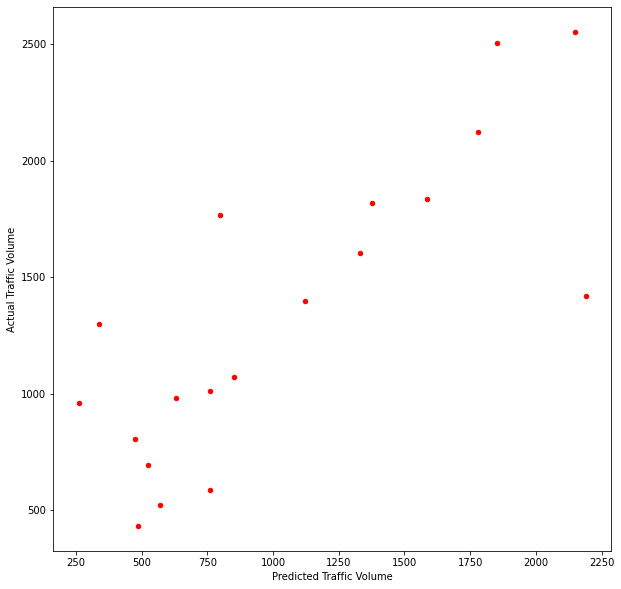

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
road_lengths.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume')
ax.set_ylabel('Actual Traffic Volume')
plt.show()

In [82]:
X = np.array(road_lengths['all_vehicle_pred']).reshape(-1,1)
y = np.array(road_lengths['total_volume']).reshape(-1,1)
theta = np.linalg.inv(X.T @ X) @ y.T @ X
theta = theta[0][0]

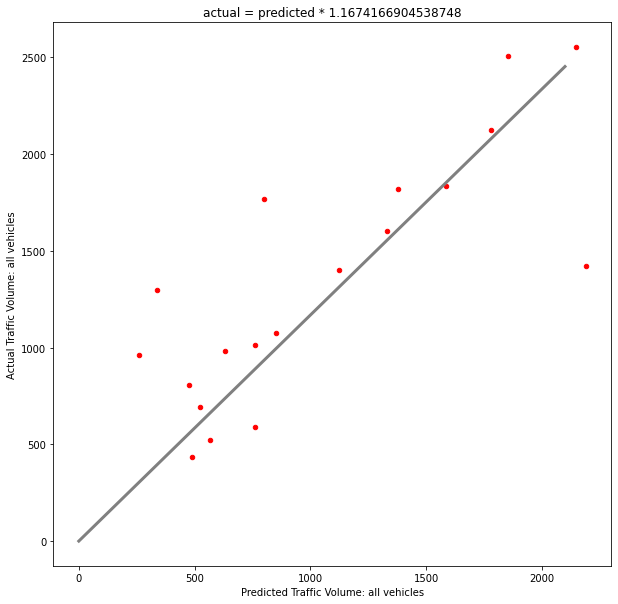

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0,2100],[0,2100*theta], lw=3, c='grey')
road_lengths.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: all vehicles')
ax.set_ylabel('Actual Traffic Volume: all vehicles')
ax.set_title(label=f"actual = predicted * {theta}")
plt.show()

In [89]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

### Convert Detections into 15 minute counts old

In [32]:
detections['length_milles'] = detections.length_m.apply(lambda x: x/1000 *5/8)

In [33]:
detections

,filename,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m,length_milles
0,M25_epping,86,0,0,0,31,0,12,0,0,0,0,129,8327.00,5.204375
1,M6_birmingham,61,3,0,0,14,2,12,0,2,0,0,94,5549.01,3.468131
2,M42_birmingham,151,18,0,0,15,6,21,0,0,0,0,211,7347.07,4.591919
3,M5_bristol,419,5,0,0,5,0,0,0,0,0,0,429,6741.38,4.213363
4,A14_2_cambridge,23,0,0,0,10,0,5,0,0,0,0,38,5764.49,3.602806
5,M11_epping,100,7,0,0,18,1,5,0,0,0,0,131,7286.01,4.553756
6,A452_birmingham,25,1,0,0,2,0,1,0,0,0,0,29,2542.41,1.589006
7,M11_2_cambridge,20,2,0,0,6,0,2,0,1,0,0,31,3308.62,2.067887
8,M4_2_bristol,225,4,0,0,4,0,3,0,0,0,0,236,4997.57,3.123481
9,M25_2_epping,36,0,0,0,20,1,2,0,1,0,0,60,3690.04,2.306275


In [5]:
# Imort the true traffic flow numbers
clean_train_report_df = pd.read_feather('/vol/bitbucket/jrb21/project/Highways/traffic_reports/clean/full_clean_report_norm')
train_report_volumes = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']]

# Sites for each road
M42_sites = ['10560', '10337', '10398']
A452_sites = ['9092', '9093']
M6_sites = ['18212', '18227']
A45_sites = ['9490', '9491']

# Group count stations by the roads
train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(
    lambda x: 'M6' if x in M6_sites
    else 'A45' if x in A45_sites
    else 'A452' if x in A452_sites
    else 'M42' if x in M42_sites
    else '' )

# Filter onto our focus roads
train_report_volumes = train_report_volumes.loc[train_report_volumes.road != '']
train_report_volumes = train_report_volumes.loc[(train_report_volumes.timestamp.dt.year==2021) &
                         (train_report_volumes.timestamp.dt.month==6) & 
                         (train_report_volumes.timestamp.dt.day==15) &
                          (train_report_volumes.timestamp.dt.hour==11) &
                          (train_report_volumes.time_interval == '44')]

# We will use speed to find the time it takes to cross the image
train_report_volumes.avg_mph = train_report_volumes.avg_mph.astype(int)


# Group the data by road and apply sum aggregations for count and mean aggregation for speed
roads_ground_truth = train_report_volumes.groupby('road').agg({'0-520cm' : 'sum', '521-660cm' : 'sum', '661-1160cm' : 'sum', '1160+cm' : 'sum', 'total_volume' : 'sum', 'avg_mph' : 'mean' })

/tmp/ipykernel_346782/1230709805.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(


In [6]:
roads_ground_truth

,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
road,,,,,,
A45,395,28,66,35,524,54.0
A452,321,44,46,22,433,53.5
M42,916,321,247,337,1821,60.0
M6,719,90,86,191,1086,60.0


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
full_table = pd.merge(detections, roads_ground_truth, on='road',how='left')

In [9]:
full_table['time_to_cross_hour'] = full_table.apply(lambda x : x.length_milles/x.avg_mph * 1/2 , axis=1) # add in half since length counts both sides of the road
full_table['time_to_cross_min'] = full_table.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

In [10]:
 detection_cols = ['small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_vehicle_detections']

In [11]:
for col in detection_cols:
    pred_col = col.replace('detections', 'pred')
    full_table[pred_col] = full_table[col] * 15 / full_table['time_to_cross_min']

In [12]:
full_table

,road,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m,length_milles,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph,time_to_cross_hour,time_to_cross_min,small_car_pred,bus_pred,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31,2.849569,395,28,66,35,524,54.0,0.026385,1.583094,255.828185,18.950236,0.0,0.0,85.276062,0.0000,28.425354,0.0,9.475118,0.0,0.0,397.954954
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01,3.468131,719,90,86,191,1086,60.0,0.028901,1.734066,328.707283,17.300383,0.0,0.0,112.452492,0.0000,51.901150,0.0,8.650192,0.0,0.0,519.011499
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07,4.591919,916,321,247,337,1821,60.0,0.038266,2.295959,679.454531,97.998250,0.0,0.0,117.597900,39.1993,104.531466,0.0,0.000000,0.0,0.0,1038.781446
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41,1.589006,321,44,46,22,433,53.5,0.014851,0.891032,370.357259,0.000000,0.0,0.0,33.668842,0.0000,16.834421,0.0,0.000000,0.0,0.0,420.860522


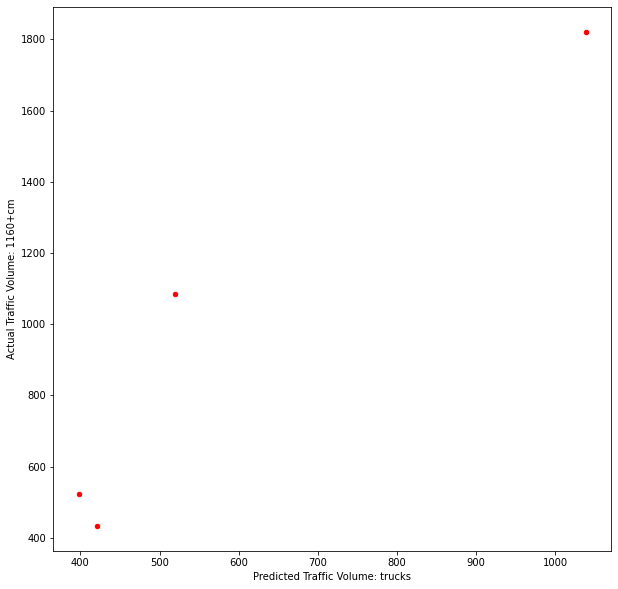

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
full_table.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: trucks')
ax.set_ylabel('Actual Traffic Volume: 1160+cm')
plt.show()

In [14]:
X = np.array(full_table['all_vehicle_pred']).reshape(-1,1)
y = np.array(full_table['total_volume']).reshape(-1,1)
theta = np.linalg.inv(X.T @ X) @ y.T @ X
theta = theta[0][0]

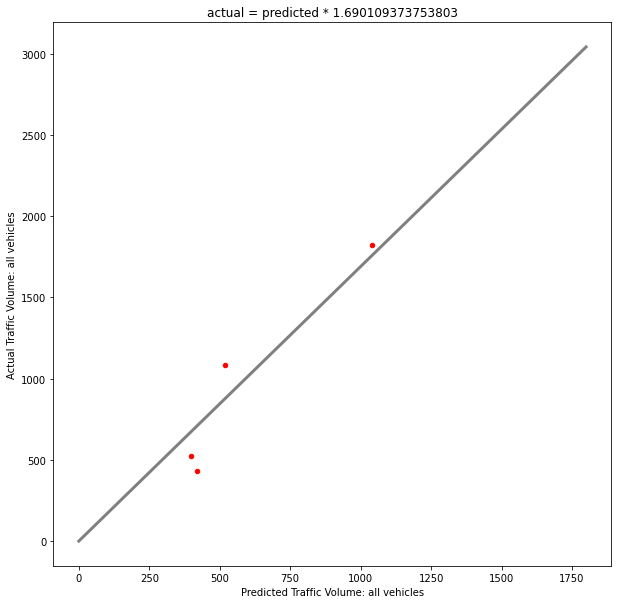

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0,1800],[0,1800*theta], lw=3, c='grey')
full_table.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: all vehicles')
ax.set_ylabel('Actual Traffic Volume: all vehicles')
ax.set_title(label=f"actual = predicted * {theta}")
plt.show()

### Mess

In [16]:
1/theta

0.5916776840181405